# International football results from 1872 to 2023

Результаты международных футбольных матчей с 1872 до 2023 года

Датасет содержит информацию о футбольных играх. Датасет взят из сайта Kaggle ('https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv'). Из трех датасетов мы взяли один под названием results.csv, в нем больше данных и категорий. 

**Столбцы**

date - дата матча, категориальная порядковая, object - можно перевести в datetime

home_team - название команды, принимающей игру, категориальная номинальная, object

away_team - название команды, приезжающей на игру, категориальная номинальная , object

home_score - основной счет хозяев поля, включая дополнительное время, не включая серии пенальти, количественная дискретная, int

away_score - общий результат команды на выезде, включая дополнительное время, не включая серии пенальти, количественная дискретная, int 

tournament - название турнира, категориальная номинальная, object

city - название города/поселка/административной единицы, где проводился матч, категориальная номинальная, object

country - название страны, где проводился матч, категориальная номинальная, object

neutral - Столбец True/False, указывающий, проводился ли матч на нейтральной площадке, категориальная номинальная бинарная, bool

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
fb = pd.read_csv('results.csv')
fb

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False


# Этап 1

**Фильтрация**

День Футбола - 10 июня. Cколько матчей было сыграно в этот день? 

In [12]:
fb['date'] = pd.to_datetime(fb['date'])

In [13]:
#  переведем столбец date в тип данных datetime, 
## чтобы было удобнее работать отдельно с днями, месяцами и годами 
fb[(fb['date'].dt.day == 10) & (fb['date'].dt.month == 6)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
222,1908-06-10,Hungary,England,0,7,Friendly,Budapest,Hungary,False
725,1923-06-10,Romania,Yugoslavia,1,2,Friendly,Bucharest,Romania,False
726,1923-06-10,Sweden,Austria,4,2,Friendly,Gothenburg,Sweden,False
809,1924-06-10,Poland,United States,2,3,Friendly,Warsaw,Poland,False
1140,1928-06-10,Poland,United States,3,3,Friendly,Warsaw,Poland,False
...,...,...,...,...,...,...,...,...,...
43950,2022-06-10,South Korea,Paraguay,2,2,Friendly,Suwon,South Korea,False
43951,2022-06-10,Chile,Tunisia,0,2,Kirin Cup,Kobe,Japan,True
43952,2022-06-10,Japan,Ghana,4,1,Kirin Cup,Kobe,Japan,False
44579,2023-06-10,Mexico,Cameroon,2,2,Friendly,San Diego,United States,True


In [2]:
# расчет процента 
217*100/44934

0.48293052031868966

217 матчей из 44934 матчей были сыграны в международный день футбола. Это почти 0.5% матчей от общего количества 

In [39]:
fb[fb['date'].dt.year > 2000]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23839,2001-01-04,Kenya,Zambia,2,1,Friendly,Nairobi,Kenya,False
23840,2001-01-06,Costa Rica,Guatemala,5,2,FIFA World Cup qualification,Miami,United States,True
23841,2001-01-06,Egypt,United Arab Emirates,2,1,Friendly,Cairo,Egypt,False
23842,2001-01-06,Eswatini,Angola,1,0,Friendly,Manzini,Eswatini,False
23843,2001-01-07,Angola,Lesotho,2,0,Friendly,Manzini,Eswatini,True
...,...,...,...,...,...,...,...,...,...
44929,2023-09-12,Belgium,Estonia,5,0,UEFA Euro qualification,Brussels,Belgium,False
44930,2023-09-12,Sweden,Austria,1,3,UEFA Euro qualification,Stockholm,Sweden,False
44931,2023-09-12,Switzerland,Andorra,3,0,UEFA Euro qualification,Sion,Switzerland,False
44932,2023-09-12,Israel,Belarus,1,0,UEFA Euro qualification,Tel Aviv,Israel,False


Чуть меньше половины матчей из нашего датасета были сыграны в 21 веке - 21095 матчей из 44934. 

In [10]:
fb[fb['tournament'].str.contains('Cup')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1080,1927-09-18,Czechoslovakia,Austria,2,0,Central European International Cup,Prague,Czechoslovakia,False
1081,1927-09-25,Hungary,Austria,5,3,Central European International Cup,Budapest,Hungary,False
1087,1927-10-23,Czechoslovakia,Italy,2,2,Central European International Cup,Prague,Czechoslovakia,False
1095,1927-11-06,Italy,Austria,0,1,Central European International Cup,Bologna,Italy,False
1106,1928-01-01,Italy,Switzerland,3,2,Central European International Cup,Genoa,Italy,False
...,...,...,...,...,...,...,...,...,...
44901,2023-09-12,Ecuador,Uruguay,2,1,FIFA World Cup qualification,Quito,Ecuador,False
44902,2023-09-12,Venezuela,Paraguay,1,0,FIFA World Cup qualification,Maturín,Venezuela,False
44903,2023-09-12,Peru,Brazil,0,1,FIFA World Cup qualification,Lima,Peru,False
44904,2023-09-12,Chile,Colombia,0,0,FIFA World Cup qualification,Santiago,Chile,False


Более 40% матчей из нашего датасета являются матчами в ходе соревнований на кубок, среди них Кубок Центральной Европы по футболу и Чемпионат мира по футболу

Бразилия считается страной, которая выигрывала больше всего матчей в Чемпионате мира по футболу. Проверим эту гипотезу на отборочных турах

In [10]:
fb[((fb['tournament'] == 'FIFA World Cup qualification')|(fb['tournament'] == 'FIFA World Cup') )
    & ((fb['home_team'] == 'Brazil')
    |(fb['away_team'] == 'Brazil'))]  

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Гости
1324,1930-07-20,Bolivia,Brazil,0,4,FIFA World Cup,Montevideo,Uruguay,True,Гости
1691,1934-05-27,Brazil,Spain,1,3,FIFA World Cup,Genoa,Italy,True,Гости
2101,1938-06-05,Brazil,Poland,6,5,FIFA World Cup,Strasbourg,France,True,Хозяева
2111,1938-06-12,Brazil,Czechoslovakia,1,1,FIFA World Cup,Bordeaux,France,True,Ничья
...,...,...,...,...,...,...,...,...,...,...
44334,2022-12-02,Cameroon,Brazil,1,0,FIFA World Cup,Lusail,Qatar,True,Хозяева
44342,2022-12-05,Brazil,South Korea,4,1,FIFA World Cup,Doha,Qatar,True,Хозяева
44345,2022-12-09,Croatia,Brazil,1,1,FIFA World Cup,Al Rayyan,Qatar,True,Ничья
44820,2023-09-08,Brazil,Bolivia,5,1,FIFA World Cup qualification,Belém,Brazil,False,Хозяева


В нашем датасете информация о 129 матчей Чемпионата мира, в том числе отборочные туры, в которых участвовала Бразилия. В скольких из них победила Бразилия?

In [11]:
fb[((fb['tournament'] == 'FIFA World Cup qualification')|(fb['tournament'] == 'FIFA World Cup') )
    & (((fb['home_team'] == 'Brazil') & (fb['home_score'] > fb['away_score']))
    |((fb['away_team'] == 'Brazil') & (fb['away_score'] > fb['home_score'])))].shape

(160, 10)

In [12]:
# расчет процента 
160*100/243

65.84362139917695

160 матча из 129, в которых участвовала Бразилия, были выигрышными для страны (**это почти 66% матчей от общего количества матчей, сыгранных Бразилией**). Исходя из фильтрации, в какой-то степени гипотеза о том, что Бразилия очень часто выигрывала матчи Чемпионата, подтверждается

In [14]:
fb[(fb['home_score'] == 0) & (fb['away_score'] == 0)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
66,1889-04-15,Wales,Scotland,0,0,British Home Championship,Wrexham,Wales,False
141,1902-03-03,Wales,England,0,0,British Home Championship,Wrexham,Wales,False
173,1905-04-09,Hungary,Austria,0,0,Friendly,Budapest,Hungary,False
177,1905-08-15,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False
...,...,...,...,...,...,...,...,...,...
44824,2023-09-08,Myanmar,Nepal,0,0,Friendly,Yangon,Myanmar,False
44826,2023-09-08,Burkina Faso,Eswatini,0,0,African Cup of Nations qualification,Marrakech,Morocco,True
44842,2023-09-09,South Africa,Namibia,0,0,Friendly,Johannesburg,South Africa,False
44854,2023-09-09,Andorra,Belarus,0,0,UEFA Euro qualification,Andorra la Vella,Andorra,False


In [5]:
# расчет процента 
3659*100/44934

8.143054257355232

8% матчей от общего количества матчей (3659 матчей из более 44 тысяч) были сыграны в ничью с баллами 0:0 

**Сортировка**

In [10]:
fb.sort_values(by = 'home_score', ascending = False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
24160,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8027,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
11225,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
24157,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
6134,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
...,...,...,...,...,...,...,...,...,...
16075,1989-10-11,Poland,England,0,0,FIFA World Cup qualification,Chorzów,Poland,False
16074,1989-10-11,Luxembourg,Portugal,0,3,FIFA World Cup qualification,Saarbrücken,Germany,True
16069,1989-10-11,Cyprus,Malta,0,0,Friendly,Larnaca,Cyprus,False
16066,1989-10-08,Guatemala,United States,0,0,CONCACAF Championship,Guatemala,Guatemala,False


Самое большое количество голов, которые забила команда-хозяева, составляет 31 балл. Примечательно, что матч был сыгран в 2001 году между Австралией и Американским Самоа, и вторые - не забили ни одного гола. 

In [30]:
fb.sort_values(by = 'date')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44907,2023-09-12,China PR,Syria,0,1,Friendly,Chengdu,China PR,False
44908,2023-09-12,Egypt,Tunisia,1,3,Friendly,Cairo,Egypt,False
44909,2023-09-12,Germany,France,2,1,Friendly,Dortmund,Germany,False
44901,2023-09-12,Ecuador,Uruguay,2,1,FIFA World Cup qualification,Quito,Ecuador,False


Самый ранний матч в нашем датасете датируется 30 ноября 1872 годом - это матч между Шотландией и Англией, вне каких-либо турниров, и сыгран матч вничью. При этом нам виден и самый "поздний" матч - это произошло сравнительно недавно - 12 сентября 2023 года между Румыний и Косово в рамках отборочных в Чемпионат Европы по футболу, получается, что датасет постоянно обновляется. 

In [34]:
fb.sort_values(by = ['away_score', 'date'], ascending = [False, True])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
27753,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True
15020,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
26066,2003-06-30,Sark,Isle of Wight,0,20,Island Games,St. Martin,Guernsey,True
36434,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
13017,1983-08-22,Niue,Papua New Guinea,0,19,South Pacific Games,Apia,Western Samoa,True
...,...,...,...,...,...,...,...,...,...
44926,2023-09-12,Spain,Cyprus,6,0,UEFA Euro qualification,Granada,Spain,False
44929,2023-09-12,Belgium,Estonia,5,0,UEFA Euro qualification,Brussels,Belgium,False
44931,2023-09-12,Switzerland,Andorra,3,0,UEFA Euro qualification,Sion,Switzerland,False
44932,2023-09-12,Israel,Belarus,1,0,UEFA Euro qualification,Tel Aviv,Israel,False


Самое большое количество голов, забитых командой-гостем, составляет 21 гол. Этот матч был отыгран в 2005 году. Остальные три матча, у которых голы от команды-гостя составляют 20 голов - были отыграны в разное время: в 1987, 2003 и 2014 годах. Еще одним примечательным фактом является то, что эти матчы были сыграны на нейтральной территории (столбец neutral равно True)

# Этап 2

**Частотные таблицы по столбцам**

In [5]:
fb['home_score'].value_counts()

1     13322
0     10857
2      9866
3      5261
4      2729
5      1298
6       706
7       382
8       204
9       125
10       66
11       36
12       27
13       16
14       11
15        8
16        6
19        3
17        3
21        2
30        1
24        1
18        1
20        1
22        1
31        1
Name: home_score, dtype: int64

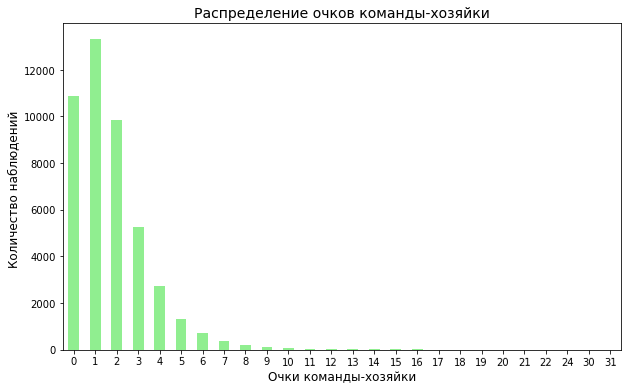

In [5]:
fig, ax = plt.subplots(figsize=[10,6])
fb['home_score'].value_counts().sort_index().plot(kind = 'bar', color = 'lightgreen', rot = True)
ax.set_title('Распределение очков команды-хозяйки', fontsize = 14)
ax.set_ylabel('Количество наблюдений ', fontsize=12)
ax.set_xlabel('Очки команды-хозяйки', fontsize=12)
plt.show()

Для визуализации распределения переменной основного счета хозяев (дискретная переменная) мы использовали столбчатую диаграмму. По частотной таблице и на графике видно, что чаще всего команды-хозяев забивали 1 гол (13322 раз встречается в данных), затем идет значение 0 и 2.  По графику видно, что распределение асиметричное, так как есть аномально высокие значения (4 баллов и более). Мы их также наблюдаем и в частотной таблице. 

In [6]:
fb['away_score'].value_counts()

0     16741
1     14548
2      7786
3      3304
4      1375
5       569
6       288
7       144
8        71
9        36
10       25
12        8
13        7
11        7
15        6
18        5
16        3
20        3
17        3
14        2
19        2
21        1
Name: away_score, dtype: int64

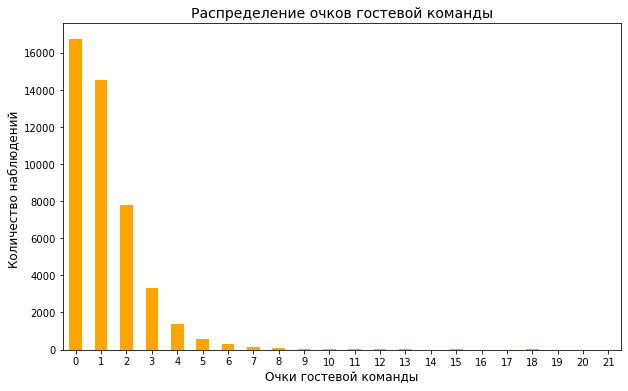

In [4]:
fig, ax = plt.subplots(figsize=[10,6])
fb['away_score'].value_counts().sort_index().plot(kind = 'bar', color = 'orange', rot = True)
ax.set_title('Распределение очков гостевой команды', fontsize = 14)
ax.set_ylabel('Количество наблюдений ', fontsize=12)
ax.set_xlabel('Очки гостевой команды', fontsize=12)
plt.show()

Для визуализации распределения переменной основного счета гостевой команды (дискретная переменная) мы также использовали столбчатую диаграмму. По частотной таблице и на графике видно, что чаще всего команды-гости забивали 0 голов (16741 раз встречается в данных), затем идет значение 1 и 2. По графику видно, что распределение асиметричное, так как есть аномально высокие значения (3 баллов и более). Мы их также наблюдаем и в частотной таблице. Интересно, что распределение этой переменной во многом совпадает с распределением основного счета хозяев.

In [7]:
fb['neutral'].value_counts()

False    33739
True     11195
Name: neutral, dtype: int64

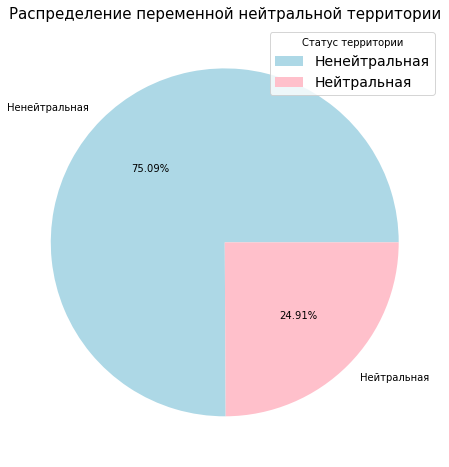

In [5]:
labels = ['Ненейтральная', 'Нейтральная']
colors = ['lightblue', 'pink']
fig, ax = plt.subplots(figsize=[10,8])
ax.pie(fb['neutral'].value_counts(), labels = labels, autopct='%.2f%%', colors=colors)
ax.legend(title = 'Статус территории', fontsize = 14)
ax.set_title('Распределение переменной нейтральной территории', fontsize = 15)
plt.show()

Для категориальной бинарной переменной, показывающей, прошел ли матч на нейтральной территории или нет, мы использовали круговую диаграмму. По частотной таблице и на диаграмме видно, что чаще всего матчи проходили на не нейтральной территории (75%,  33739 раз встречается в таблице), на нейтральной проходило 25% матчей (11195 раз встречается в таблице). 

**Частотные таблицы по отфильтрованным данным**

На первом этапе мы делали фильтрацию и смотрели, является ли правдой то, что Бразилия очень часто выигрывала матчи Чемпионата. Посмотрим, в каких случаях в отборочных турах чемпионата мира Бразилия суммарно чаще побеждала: когда была "хозяйкой" или 'гостьей'?

In [17]:
fb[(fb['tournament'] == 'FIFA World Cup qualification')
   & (fb['home_team'] == 'Brazil')].shape

(64, 10)

In [19]:
fb[(fb['tournament'] == 'FIFA World Cup qualification')
   & (fb['away_team'] == 'Brazil')].shape

(65, 10)

In [6]:
fb[(fb['tournament'] == 'FIFA World Cup qualification')
    & (((fb['home_team'] == 'Brazil') & (fb['home_score'] > fb['away_score']))
    |((fb['away_team'] == 'Brazil') & (fb['away_score'] > fb['home_score'])))][['home_score', 'away_score']].sum()

home_score    179
away_score    105
dtype: int64

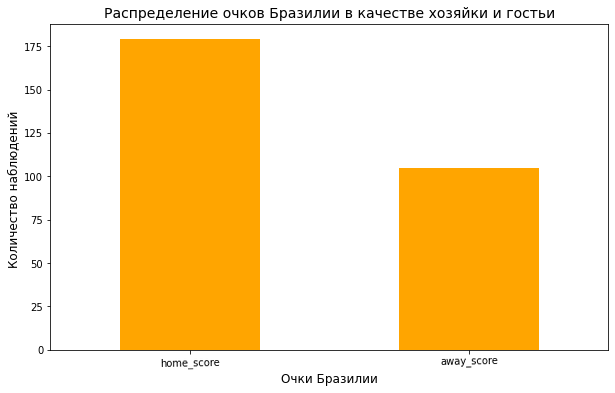

In [22]:
fig, ax = plt.subplots(figsize=[10,6])
fb[(fb['tournament'] == 'FIFA World Cup qualification') 
    & (((fb['home_team'] == 'Brazil') & (fb['home_score'] > fb['away_score']))
    |((fb['away_team'] == 'Brazil') & (fb['away_score'] > fb['home_score'])))][['home_score', 'away_score']].sum().plot(kind = 'bar', color = 'orange', rot = True)

ax.set_title('Распределение очков Бразилии в качестве хозяйки и гостьи', fontsize = 14)
ax.set_ylabel('Количество наблюдений ', fontsize=12)
ax.set_xlabel('Очки Бразилии', fontsize=12)
plt.show()

Для иллюстрации такого распределения мы выбрали столбчатую диаграмму. На ней видно, что суммарно больше очков Бразилия набрала, когда была "хозяйкой" матча (179 голов, а когда была гостьей - примерно 105). При этом как мы выяснили ранее: Бразилия в отборочных Чемпионата практически одинаковое количество раз участвовала в качестве как хозяйки, так и гостьи (64 и 65 раз соответственно).

Мы решили объединить две фильтрации, чтобы было корректнее визуализировать данные. Взяли фильтрации про соревнования на кубок и про матчи, сыгранные вничью по 0 баллам. Посмотрим, сколько матчей вничью по 0 баллам было сыграно среди соревнований на кубок. 

In [8]:
fb[(fb['tournament'].str.contains('Cup'))
  & ((fb['home_score'] == 0) & (fb['away_score'] == 0))]['tournament'].value_counts()[0:10]

FIFA World Cup qualification            603
African Cup of Nations qualification    216
African Cup of Nations                   79
FIFA World Cup                           78
CECAFA Cup                               67
AFC Asian Cup qualification              53
COSAFA Cup                               47
Gulf Cup                                 46
CFU Caribbean Cup qualification          37
AFC Asian Cup                            29
Name: tournament, dtype: int64

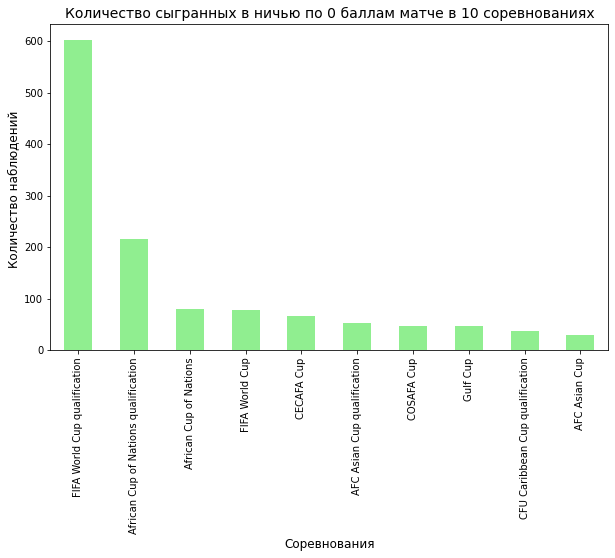

In [6]:
fig, ax = plt.subplots(figsize=[10,6])
fb[(fb['tournament'].str.contains('Cup'))
  & ((fb['home_score'] == 0) & (fb['away_score'] == 0))]['tournament'].value_counts()[0:10].plot(kind='bar', color = 'lightgreen')
ax.set_title('Количество сыгранных в ничью по 0 баллам матче в 10 соревнованиях', fontsize = 14)
ax.set_ylabel('Количество наблюдений ', fontsize=12)
ax.set_xlabel('Соревнования', fontsize=12)
plt.show()

Так как значений было слишком много, мы отобрали первые 10 соревнований, на которых было сыграно больше всего матчей вничью. Больше всего таких матчей произошло во время отборочных в FIFA World Cup (603 матча). За ним идут отборочные в African Cup of Nations (около 216). Остальные 8 соревнований имеют примерно одинаковое количество матчей, сыгранных вничью (не более 100, их соотношение видно в частотной таблице)

Вновь возьмем только соревнования на кубок, сыгранные в 21 веке. Посмотрим, в скольких матчах гостевая команда обыгрывала хозяев или, наоборот, проигрывала им? 

In [14]:
x = fb[(fb['date'].dt.year > 2000)&(fb['tournament'].str.contains('Cup'))]

In [15]:
(x['away_team'] > x['home_team']).value_counts()

True     4940
False    4935
dtype: int64

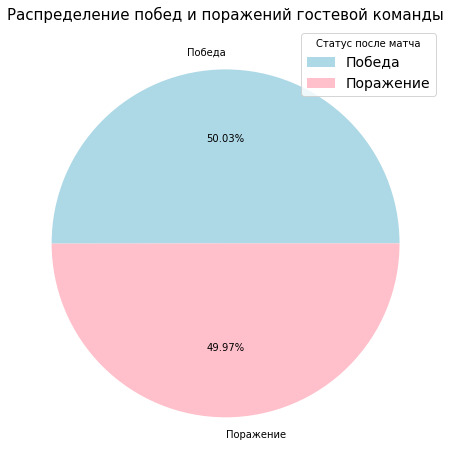

In [16]:
labels = ['Победа', 'Поражение']
colors = ['lightblue', 'pink']
fig, ax = plt.subplots(figsize=[10,8])
ax.pie((x['away_team'] > x['home_team']).value_counts(), labels = labels, autopct='%.2f%%', colors=colors)
ax.legend(title = 'Статус после матча', fontsize = 14)
ax.set_title('Распределение побед и поражений гостевой команды', fontsize = 15)
plt.show()

Для того, чтобы ответить на вопрос, мы выбрали круговую диаграмму. Интересно, что гостевая команда в таких матчах одинаково проигрывала и побеждала. 50% с победы и с поражения. Правда по частотной таблице видно, что поражений было чуть меньше: 4935 матчей, а побед - 4940

**Создание переменной**

Cоздадим переменную, в которой пропишем, кто стал победителем: гостевая команда, хозяева или матч сыгран вничью. С такой переменной будет удобнее работать, нежели постоянно сравнивать очки в столбцах home_score и away_score 

In [7]:
def winner(scores_1, scores_2):
    if scores_1 < scores_2:
        return 'Хозяева'
    elif scores_1 > scores_2:
        return 'Гости'
    else:
        return 'Ничья'

In [8]:
fb['winner'] = fb[['away_score', 'home_score']].apply(lambda fb:  winner(fb['away_score'], fb['home_score']), axis=1)

# Этап 3

**Расчет МЦТ**

*Баллы команды-хозяйки*

In [24]:
fb['home_score'].mean()

1.739506832242845

В среднем команды хозяйки забивали 2 гола с округлением

In [25]:
fb['home_score'].median()

1.0

50% команд хозяек забили 1 и меньше голов. Разница между средним и медианой небольшая, причем среднее больше. Посмотрим на выбросы в этой переменной дальше

In [26]:
fb['home_score'].mode()

0    1
dtype: int64

Чаще всего команда хозяек забивала 1 гол

*Баллы команды-гостьи*

In [27]:
fb['away_score'].mean()

1.1782837049895403

В среднем гостевые команды забивали 1 гол

In [28]:
fb['away_score'].median()

1.0

50% гостевых команд забивали 1 гол и меньше. Различие между средним и медианой в этой переменной минимальное (примерно 0.18 с округлением). 

In [29]:
fb['away_score'].mode()

0    0
dtype: int64

Чаще всего гостевые команды не забивали голов

*Рассмотрим моды у номинальных переменных, так как остальные МЦТ с ними посчитать нельзя*

In [30]:
fb['tournament'].mode()

0    Friendly
dtype: object

Чаще всего матчи в наших данных были дружественными

In [31]:
fb['city'].mode()

0    Kuala Lumpur
dtype: object

Большинство матчей из нашей таблицы проводились в городе Kuala Lumpur - Малайзия. 

In [32]:
fb['country'].mode()

0    United States
dtype: object

In [64]:
fb['country'].value_counts()

United States        1331
France                834
Malaysia              759
England               727
Sweden                664
                     ... 
Portuguese Guinea       1
Micronesia              1
Mali Federation         1
Lautoka                 1
Bonaire                 1
Name: country, Length: 268, dtype: int64

Чаще всего матчи проводились в США - 1331 раз. На втором месте Франция (834 матча), Малазия, кстати, тоже не ушла далеко - 759 матчей

In [33]:
fb['home_team'].mode()

0    Brazil
dtype: object

In [65]:
fb['home_team'].value_counts()

Brazil                       598
Argentina                    578
Mexico                       564
Germany                      532
England                      527
                            ... 
Central Spain                  1
Madrid                         1
Saint Pierre and Miquelon      1
Sark                           1
Hmong                          1
Name: home_team, Length: 312, dtype: int64

Чаще всего в качестве команды-хозяйки выступала Бразилия - 598 раз. 

In [34]:
fb['away_team'].mode()

0    Uruguay
dtype: object

In [66]:
fb['away_team'].value_counts()

Uruguay          563
Sweden           549
England          528
Hungary          493
Paraguay         476
                ... 
Central Spain      1
Biafra             1
Asturias           1
Aymara             1
Manchukuo          1
Name: away_team, Length: 307, dtype: int64

Чаще всего в качестве гостевой команды выступал Уругвай - 563 раза. 

In [35]:
fb['winner'].mode()

0    Хозяева
dtype: object

Большинство матчей были выиграны командами хозяевами. 

In [67]:
fb['date'].mode()

0   2012-02-29
dtype: datetime64[ns]

In [39]:
fb[fb['date'] == '2012-02-29'].shape

(66, 10)

Большинство матчей прошли 29 февраля 2012 года. Таких матчей было 66. Посмотрим, в каких турнирах. 

In [68]:
fb[fb['date'] == '2012-02-29']['tournament'].value_counts()

Friendly                                43
African Cup of Nations qualification    13
FIFA World Cup qualification            10
Name: tournament, dtype: int64

В самую популярную дату в нашем датасете прошли три турнира: 43 дружественных матча, 10 отборочных в Чемпионат мира, 13 отборочных матчей в Чемпионате Африки

# Визуализация выбросов

Свизуализируем выбросы для переменных очков - гостевой команды и команды-хозяйки.

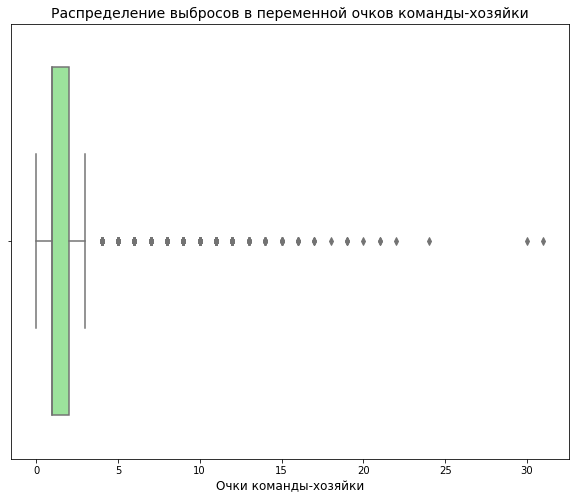

In [20]:
fig, ax = plt.subplots(figsize=[10,8])
sns.boxplot(x=fb['home_score'], color = 'lightgreen')
ax.set_title('Распределение выбросов в переменной очков команды-хозяйки', fontsize = 14)
ax.set_xlabel('Очки команды-хозяйки', fontsize=12)
plt.show()

Несмотря на то что среднее и медиана переменной очков команды-хозяйки не слишком сильно отличались друг от друга, все же на графике видны выбросы. Нижняя граница значений остановлена на нуле (что логично, меньше нуля голов не может быть), верхняя остановилась до 5 очков. Все, что идет за верхней границей, считаетсч выбросами. Они с одинаковой частотой достигают 20 очков для одной команды, и есть также значения больше 25-30

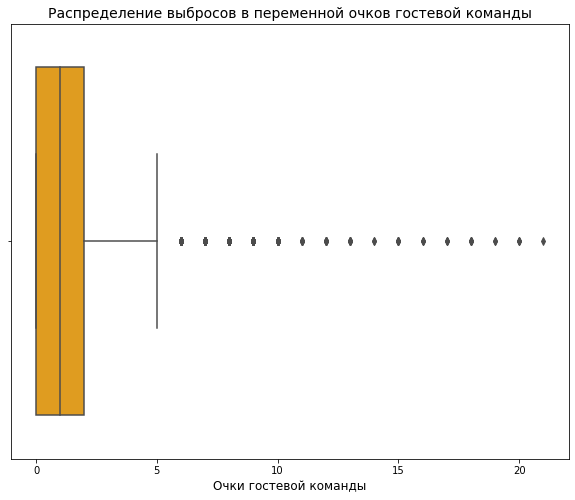

In [24]:
fig, ax = plt.subplots(figsize=[10,8])
sns.boxplot(x=fb['away_score'], color = 'orange')
ax.set_title('Распределение выбросов в переменной очков гостевой команды', fontsize = 14)
ax.set_xlabel('Очки гостевой команды', fontsize=12)
plt.show()

Несмотря на то что среднее и медиана переменной очков команды-гостьи почти не отличались друг от друга, все же на графике видны выбросы. Нижней границы значений нет рна графике, но она также не может быть меньше нуля. Раннее мы выяснили, что чаще всего у гостевых команд голов было ноль, поэтому с этого значения начинается сам "ящик" - уплотнение значений переменной. Верхняя остановилась на 5 баллах. Все, что идет за верхней границей, считается выбросами. Они с одинаковой частотой достигают более 20 очков для одной команды. Выбросов в этой переменной визуально меньше, чем у команды-хозяйки.

**Количество выбросов - межквартильное расстояние**

*Рассчитаем количество выбросов для команды - хозяйки* 

In [14]:
q1 = np.percentile(fb['home_score'], 25)
q3 = np.percentile(fb['home_score'], 75)
iqr = q3 - q1
# нижняя граница
line1 = q1 - 1.5*iqr
# верхняя граница
line2 =  q3 + 1.5*iqr
line1, line2

(-0.5, 3.5)

Нижняя граница по расчету оказалась меньше нуля, соответственно, выбросов за этой границей нет (что и показал график), верхняя равна 3.5 - за этой границей могут быть выбросы. Рассчитаем их количество с помощью фильтрации

In [46]:
fb[fb['home_score'] > line2].shape

(5628, 10)

По межквартильному расстоянию количество выбросов в команде - хозяйке составляет 5628 матчей. Рассчитаем количество по второму способу

**Количество выбросов - стандартное отклонение**

In [15]:
mean = fb['home_score'].mean()
std = fb['home_score'].std()
# нижняя граница
line_1 = mean - 2*std
# верхняя граница
line_2 = mean + 2*std
line_1, line_2

(-1.7542384648748548, 5.233252129360545)

Мы предположили, что выбросами будут те значения, которые отличаются от среднего на 2 стандартных отклонения и более. Таким образом, нижняя граница стала равна -1.7, число отрицательное, вновь за этой границей выбросов не будет. Верхняя граница равна 5.23 с округлением. Рассчитаем  количество  выбросов с помощью фильтрации 

In [55]:
fb[fb['home_score'] >= line_2].shape

(1601, 10)

По стандартному отклонению количество выбросов в команде - хозяйке составляет 1601 матчей. Выбросов по этому способу стало почти в 5 раз меньше, чем по межквартильному размаху. Возможно, дело в том, что стандартное отклонение расширило значение границ и соответственно нашла меньше выбросов (разница между значениями нижней и верхней границе в двух способах отчетливо видно, по стандартному отклонению обе границы стали больше). Нам кажется, что способ со стандартным отклонением лучше, так как меньше значений становятся с выбросами и больше информации остается, с которой можно работать  

**Замена выбросов**

*Заменим выбросы, рассчитанные по стандартному отклонению, на медиану, в новом массиве*

In [17]:
new_home = fb['home_score'].apply(lambda x: fb['home_score'].median() if x > line_2 else x)

In [23]:
new_home.mean()

1.5098589041705612

In [24]:
new_home.median()

1.0

In [25]:
new_home.mode()

0    1.0
dtype: float64

Замена выбросов привела к тому, что среднее стало меньше, чем до удаления (до удаления 1.74 с округлением, после - 1.50 с округлением), при этом оно все так же чуть больше медианы (она не изменилась, как и мода) 

**Пропущенные значения**

In [22]:
fb.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
winner        0
dtype: int64

Пропущенных значений в наших данных нет

**Корреляционная матрица**

In [8]:
fb[['home_score', 'away_score']].corr()

,home_score,away_score
home_score,1.000000,-0.138923
away_score,-0.138923,1.000000


Единственные переменные, между которыми можно было хоть как-то провести корреляцию - это переменные очков. Результат корреляции оказался вполне ожидаемый: зависимость обратная, то есть чем меньше баллы одной команды, тем больше другой. При этом связь довольно таки слабая - -0.14, видимо, это связано с большим отрывом очков, которые есть. 

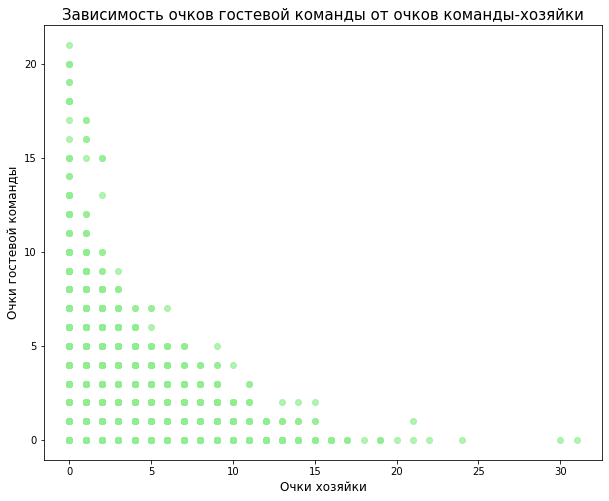

In [19]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(fb['home_score'], y = fb['away_score'], alpha=0.7, c = 'lightgreen')
ax.set_title('Зависимость очков гостевой команды от очков команды-хозяйки', fontsize=15)
ax.set_xlabel('Очки хозяйки', fontsize=12)
ax.set_ylabel('Очки гостевой команды', fontsize=12)
plt.show()

Из-за того, что переменные у нас дискретные, график рассеяния выглядит немного иначе. Но по графику все так же можно говорить об отсутствии сильной взаимосвязи, так как есть выбросы. Рассчитаем коэффициент и построим график без выбросов. 

In [28]:
mean = fb['away_score'].mean()
std = fb['away_score'].std()
# нижняя граница
line1 = mean - 2*std
# верхняя граница
line2 = mean + 2*std
line1, line2

(-1.607789376019899, 3.9643567859989792)

In [29]:
new_fb = fb[(fb['home_score'] < line_2) & (fb['away_score'] < line2)]

Коэффициент корреляции -0.07460840957465094


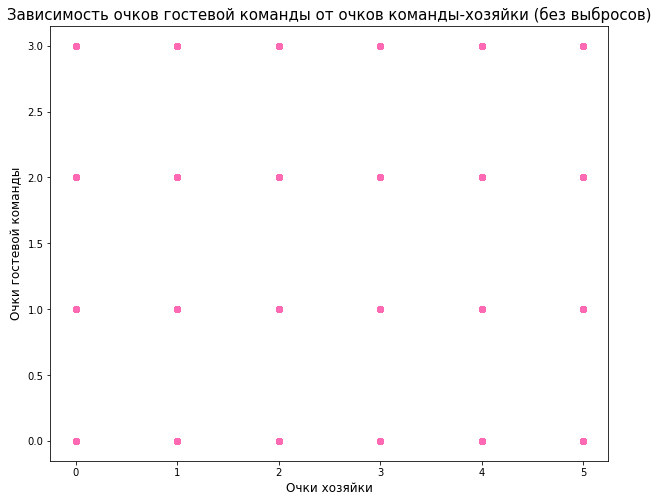

In [31]:
print('Коэффициент корреляции', new_fb['home_score'].corr(new_fb['away_score']))
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(new_fb['home_score'], y = new_fb['away_score'], alpha=0.7, c = 'hotpink')
ax.set_title('Зависимость очков гостевой команды от очков команды-хозяйки (без выбросов)', fontsize=15)
ax.set_xlabel('Очки хозяйки', fontsize=12)
ax.set_ylabel('Очки гостевой команды', fontsize=12)
plt.show()

Без выбросов коэффициент стал еще меньше, а на графике мы увидели еще большее отсутствие какой бы то ни было связи